In [3]:
# Import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

# Configure inline mode
%matplotlib inline

In [4]:
data = pd.read_pickle("../../Data/New/Main_Data/Final_Dataset.pkl")

In [5]:
pd.set_option('display.max_rows', 500)

In [6]:
data.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Measles,BMI_5-19_years,...,Under-Five_Deaths,Polio,Total_Expenditure,Diphtheria,GDP,Population,Thinness_10-19_years,Thinness_5-9_years,Income_Composition_Of_Resources,Schooling
0,Afghanistan,2014,Low income,63.0,234,64.0,0.03,9.7,492.0,17.2,...,86.0,58,12.00,62,625.339539,32758020.0,17.7,17.7,0.441,3.5
1,Afghanistan,2013,Low income,62.7,235,66.0,0.03,8.8,430.0,17.1,...,89.0,62,10.59,64,647.966460,31731688.0,17.9,18.0,0.443,3.5
2,Afghanistan,2012,Low income,62.2,242,69.0,0.04,7.9,2787.0,17.0,...,93.0,67,11.67,67,648.511070,30696958.0,18.2,18.2,0.442,3.4
3,Afghanistan,2011,Low income,61.7,248,71.0,0.04,8.6,3013.0,16.9,...,97.0,68,10.17,68,599.297630,29708599.0,18.4,18.4,0.426,3.3
4,Afghanistan,2010,Low income,61.2,255,74.0,0.03,8.6,1989.0,16.8,...,101.0,66,14.40,66,550.514974,28803167.0,18.6,18.7,0.421,3.2


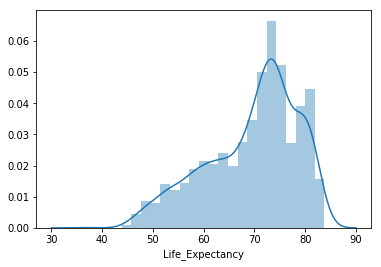

In [7]:
# Distribution of the outcome variable (Price)
sb.distplot(data['Life_Expectancy'])

In [8]:
y = data['Life_Expectancy']

In [9]:
data['Status'].value_counts()

High income            675
Upper middle income    570
Lower middle income    465
Low income             360
Name: Status, dtype: int64

In [10]:
X = pd.concat([data, pd.get_dummies(data['Status'])], axis=1)
#X = X.drop(['Life_Expectancy','Status', 'CNG'], axis=1)

In [11]:
X.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Measles',
       'BMI_5-19_years', 'BMI_18+_years', 'Under-Five_Deaths', 'Polio',
       'Total_Expenditure', 'Diphtheria', 'GDP', 'Population',
       'Thinness_10-19_years', 'Thinness_5-9_years',
       'Income_Composition_Of_Resources', 'Schooling', 'High income',
       'Low income', 'Lower middle income', 'Upper middle income'],
      dtype='object')

In [12]:
X = X.drop(['Life_Expectancy','Status', 'Low income'], axis=1)

In [13]:
X

,Country,Year,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Measles,BMI_5-19_years,BMI_18+_years,Under-Five_Deaths,...,Diphtheria,GDP,Population,Thinness_10-19_years,Thinness_5-9_years,Income_Composition_Of_Resources,Schooling,High income,Lower middle income,Upper middle income
0,Afghanistan,2014,234,64.000000,0.030000,9.700000,492.000000,17.2,22.8,86.000000,...,62,625.339539,32758020.0,17.7,17.7,0.441,3.50,0,0,0
1,Afghanistan,2013,235,66.000000,0.030000,8.800000,430.000000,17.1,22.8,89.000000,...,64,647.966460,31731688.0,17.9,18.0,0.443,3.50,0,0,0
2,Afghanistan,2012,242,69.000000,0.040000,7.900000,2787.000000,17.0,22.7,93.000000,...,67,648.511070,30696958.0,18.2,18.2,0.442,3.40,0,0,0
3,Afghanistan,2011,248,71.000000,0.040000,8.600000,3013.000000,16.9,22.6,97.000000,...,68,599.297630,29708599.0,18.4,18.4,0.426,3.30,0,0,0
4,Afghanistan,2010,255,74.000000,0.030000,8.600000,1989.000000,16.8,22.5,101.000000,...,66,550.514974,28803167.0,18.6,18.7,0.421,3.20,0,0,0
5,Afghanistan,2009,260,77.000000,0.030000,9.800000,2861.000000,16.7,22.4,106.000000,...,63,444.184404,28004331.0,18.8,18.9,0.413,3.10,0,0,0
6,Afghanistan,2008,265,79.000000,0.030000,10.300000,1599.000000,16.7,22.3,109.000000,...,64,370.382294,27294031.0,19.0,19.1,0.388,3.00,0,0,0
7,Afghanistan,2007,273,82.000000,0.030000,9.900000,1141.000000,16.6,22.2,113.000000,...,63,366.230443,26616792.0,19.2,19.3,0.386,2.90,0,0,0
8,Afghanistan,2006,276,84.000000,0.030000,10.600000,1990.000000,16.5,22.1,116.000000,...,58,269.229693,25893450.0,19.3,19.5,0.371,2.70,0,0,0
9,Afghanistan,2005,277,85.000000,0.020000,9.900000,1296.000000,16.5,22.0,118.000000,...,58,247.664140,25070798.0,19.5,19.7,0.367,2.60,0,0,0


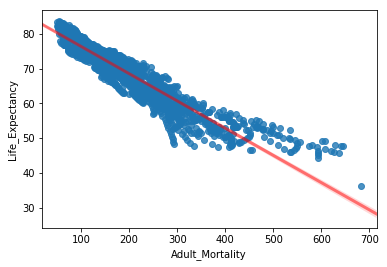

In [19]:
# Draw a scatter plot with linear regression line
sb.regplot(x=X.columns[2], y="Life_Expectancy", line_kws={"color":"r","alpha":0.5,"lw":3}, data=data)

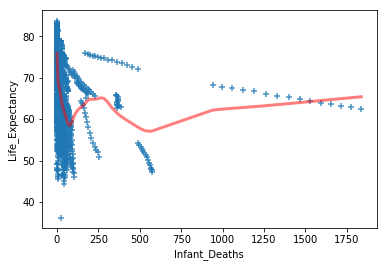

In [21]:
# Draw a scatter plot with linear regression line
sb.regplot(x=X.columns[3], y="Life_Expectancy", lowess=True, marker="+", line_kws={"color":"r","alpha":0.5,"lw":3}, data=data)

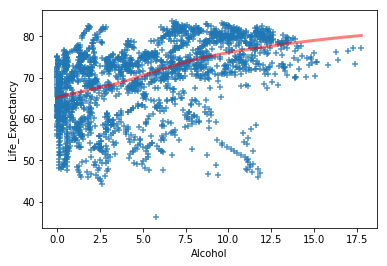

In [24]:
# Draw a scatter plot with linear regression line
sb.regplot(x=X.columns[4], y="Life_Expectancy", lowess=True, marker="+", line_kws={"color":"r","alpha":0.5,"lw":3}, data=data)